In [30]:
import pandas as pd

file_path = 'Game.xlsx'

# Read the Excel data into a DataFrame
df = pd.read_excel(file_path)

# Select the "wage" column
wage_column = df['Wage']

# Convert the "wage" column to numeric.
wage_column_numeric = pd.to_numeric(wage_column, errors='coerce')

# Calculate the first quartile (Q1)
Q1 = wage_column_numeric.quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = wage_column_numeric.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Calculate the lower bound for outliers
lower_bound = Q1 - 1.5 * IQR

# Calculate the upper bound for outliers
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the "wage" column
outliers = wage_column_numeric[(wage_column_numeric < lower_bound) | (wage_column_numeric > upper_bound)]

# Display the outliers
print("Outliers in the 'Wage' column:")
outliers



Outliers in the 'Wage' column:


Series([], Name: Wage, dtype: float64)

In [22]:
#it means that there are no values in the "Wage" column that qualify as outliers based on the Interquartile Range (IQR) method.
#This could be because all the values in the "Wage" column are within the acceptable range defined by Q1 - 1.5 * IQR and Q3 + 1.5 * IQR.

In [27]:
import pandas as pd

file_path = 'Game.xlsx'

# Read the Excel data into a DataFrame
df = pd.read_excel(file_path)

# Select the "potential" column
potential_column = df['Potential']

# Calculate statistics
potential_stats = potential_column.describe()
potential_stats


count    18207.000000
mean        71.307299
std          6.136496
min         48.000000
25%         67.000000
50%         71.000000
75%         75.000000
max         95.000000
Name: Potential, dtype: float64

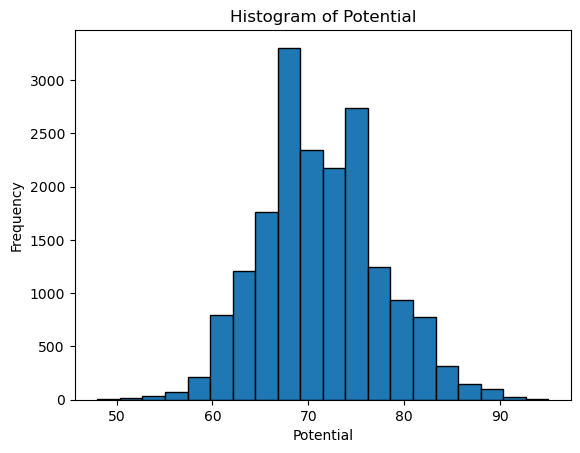

In [29]:
import matplotlib.pyplot as plt

# Create a histogram to visualize the distribution
plt.hist(potential_column, bins=20, edgecolor='black')
plt.xlabel('Potential')
plt.ylabel('Frequency')
plt.title('Histogram of Potential')
plt.show()

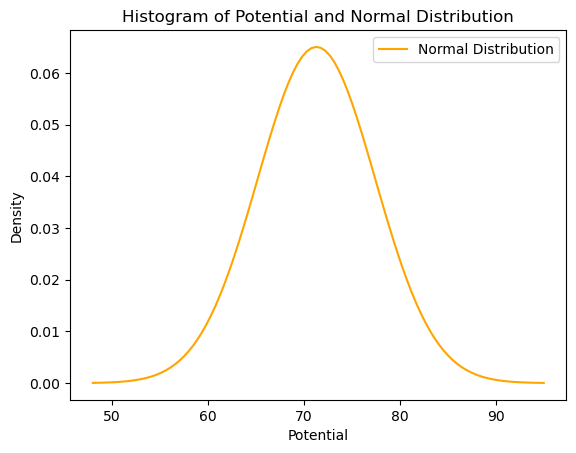

In [36]:
import numpy as np
# Select the "potential" column
potential_column = df['Potential']

# Fit the data to a normal distribution
mean_potential = potential_column.mean()
std_dev_potential = potential_column.std()
normal_distribution = stats.norm(loc=mean_potential, scale=std_dev_potential)

# Plot the normal distribution curve
x = np.linspace(potential_column.min(), potential_column.max(), 100)
plt.plot(x, normal_distribution.pdf(x), color='orange', label='Normal Distribution')

plt.xlabel('Potential')
plt.ylabel('Density')
plt.title('Histogram of Potential and Normal Distribution')
plt.legend()
plt.show()
#In the histogram, you can visualize the distribution of the "potential" column data.
#The red curve represents the normal distribution fitted to the data
#where the mean and standard deviation are calculated from the "potential" column.
#If the data closely follows the orange curve, it indicates that the "potential" column approximates a normal distribution.
#If the curve deviates significantly, the data may not conform to a normal distribution.

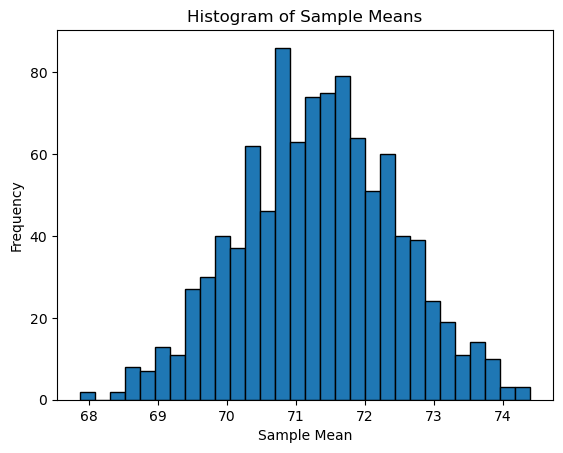

In [41]:
# Select the "potential" column
potential_data = df['Potential']

# Define the sample size and the number of samples to generate
sample_size = 30  # Choose a sample size 
num_samples = 1000  # Choose the number of samples to generate

# Create an array to store the sample means
sample_means = np.zeros(num_samples)

# Generate random samples and calculate the sample means
for i in range(num_samples):
    sample = np.random.choice(potential_data, size=sample_size, replace=False)
    sample_means[i] = np.mean(sample)

# Plot the histogram of the sample means
plt.hist(sample_means, bins=30, edgecolor='black')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Means')
plt.show()
#According to the Central Limit Theorem, as the sample size increases,
#the distribution of the sample means will approximate a normal distribution, 
#regardless of the original distribution of the data.

In [ ]:
# Define a function to calculate confidence intervals
def confidence_interval(data, confidence_levels):
    sample_size = len(data)
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)
    
    intervals = {}
    for confidence_level in confidence_levels:
        critical_value = stats.t.ppf((1 + confidence_level) / 2, df=sample_size - 1)
        margin_of_error = critical_value * (sample_std / np.sqrt(sample_size))
        lower_bound = sample_mean - margin_of_error
        upper_bound = sample_mean + margin_of_error
        intervals[confidence_level] = (lower_bound, upper_bound)
    
    return intervals

# Specify the columns for which we want to calculate confidence intervals
columns = ['Potential', 'Wage', 'Weight']

# Define the desired confidence levels
confidence_levels = [0.95, 0.90, 0.99]

for column in columns:
    # Select the data from the column
    data = df[column]

    # Calculate confidence intervals
    intervals = confidence_interval(data, confidence_levels)

    # Print the results
    print(f"Confidence Intervals for '{column}' column:")
    for confidence_level, interval in intervals.items():
        print("  {:.0%}: [{:.2f}, {:.2f}]".format(confidence_level, interval[0], interval[1]))
